✅ Model Performance:
MAE: 42.57
RMSE: 49.16
R²: -0.05


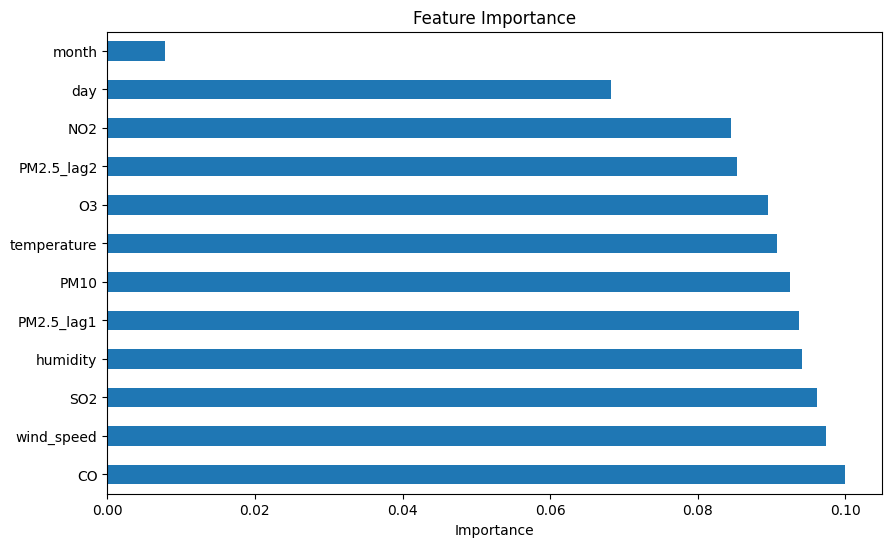

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 1: Generate dummy air quality data
def generate_dummy_data():
    np.random.seed(42)
    date_range = pd.date_range(start='2020-01-01', periods=1000, freq='h')
    df = pd.DataFrame({
        'date': date_range,
        'PM2.5': np.random.uniform(30, 200, size=len(date_range)),
        'PM10': np.random.uniform(50, 300, size=len(date_range)),
        'NO2': np.random.uniform(10, 100, size=len(date_range)),
        'CO': np.random.uniform(0.5, 3.0, size=len(date_range)),
        'O3': np.random.uniform(10, 120, size=len(date_range)),
        'SO2': np.random.uniform(5, 80, size=len(date_range)),
        'temperature': np.random.uniform(10, 35, size=len(date_range)),
        'humidity': np.random.uniform(30, 90, size=len(date_range)),
        'wind_speed': np.random.uniform(0.5, 10, size=len(date_range)),
    })
    return df

df = generate_dummy_data()

# STEP 2: Feature Engineering
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['PM2.5_lag1'] = df['PM2.5'].shift(1)
df['PM2.5_lag2'] = df['PM2.5'].shift(2)
df.dropna(inplace=True)

# STEP 3: Model Training
features = ['PM10', 'NO2', 'CO', 'O3', 'SO2', 'temperature', 'humidity', 'wind_speed',
            'month', 'day', 'PM2.5_lag1', 'PM2.5_lag2']
target = 'PM2.5'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 4: Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# STEP 5: Feature Importance Visualization
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_importance.plot(kind='barh', title='Feature Importance', figsize=(10,6))
plt.xlabel('Importance')
plt.show()
